# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [8]:
y_train.mean()  

0.0961292678473617

data is unbalanced, majority values of variable churn are 0.

### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [9]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier(max_depth=10, random_state=42)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [10]:
# Generate predictions here!
y_predict = model.predict(X_test)

In [11]:
# Calculate performance metrics here!
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       1.00      0.01      0.03       366

    accuracy                           0.90      3652
   macro avg       0.95      0.51      0.49      3652
weighted avg       0.91      0.90      0.86      3652



Precision measures the proportion of true positive predictions out of all predictions for a class.
Precision = True positive / (True positive + False positive)
### High precision: correct predictions are reliable.Most predicted 1s are actually 1.  

Class 0: Precision is 0.9, meaning 90% of the preditced 0s are actually 0.
Class 1: Precision is 1, meaning 100% of the predicted 1s are actually 1

Recall measures the proportion of true positives out of all actual positives.
Recall = True positive / (True positive + False Negative)
### High recall: model capture most actual positive. 
Class 0: Recall is 1, meaning 100% of 0s are corrected identified.
Class 1: Recall is 0.01, meaning only 1% of 1s are corrected identified. 

In this case, the precision is high, indicating that most predicted 1s are reliable. However, the recall is low for calss 1, meaning that we missed majortiy 1s in model prediction. 

In conclusion, this model missed most 1s. 

In [12]:
# adjust model 
model_adj =  RandomForestClassifier(n_estimators = 200,
                                   class_weight = 'balanced',
                                   random_state = 42,
                                   min_samples_split=5)
model_adj.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=200, random_state=42)

In [13]:
y_predict_adj = model.predict(X_test)
print(classification_report(y_predict_adj, y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3647
           1       0.01      1.00      0.03         5

    accuracy                           0.90      3652
   macro avg       0.51      0.95      0.49      3652
weighted avg       1.00      0.90      0.95      3652



In this case, the precision of class 1 is 0.01, indicating that only 1% cases identified as 1s are actual 1. Currently,
the model is biased toward class 1. 

## Feature importance 

In the random forest model, by using the built-in function (feature_importances_) on the trained model, feature importance is number of times each feature is used for splitting across all trees.

In [17]:
feature_contribution = pd.DataFrame({
    'features':X_train.columns,
    'contribution':model_adj.feature_importances_
}).sort_values(by='contribution', ascending=True).reset_index()

In [18]:
print(feature_contribution)

    index                                  features  contribution
0      46        peak_mid_peak_fix_max_monthly_diff      0.000826
1       4                  forecast_discount_energy      0.001004
2      29                     var_6m_price_peak_fix      0.001636
3      30                 var_6m_price_mid_peak_fix      0.001657
4      54  channel_ewpakwlliwisiwduibdlfmalxowmwpci      0.002929
..    ...                                       ...           ...
56     14                                net_margin      0.044428
57      5                   forecast_meter_rent_12m      0.049956
58      0                                  cons_12m      0.051583
59     11                      margin_gross_pow_ele      0.053433
60     12                        margin_net_pow_ele      0.054603

[61 rows x 3 columns]


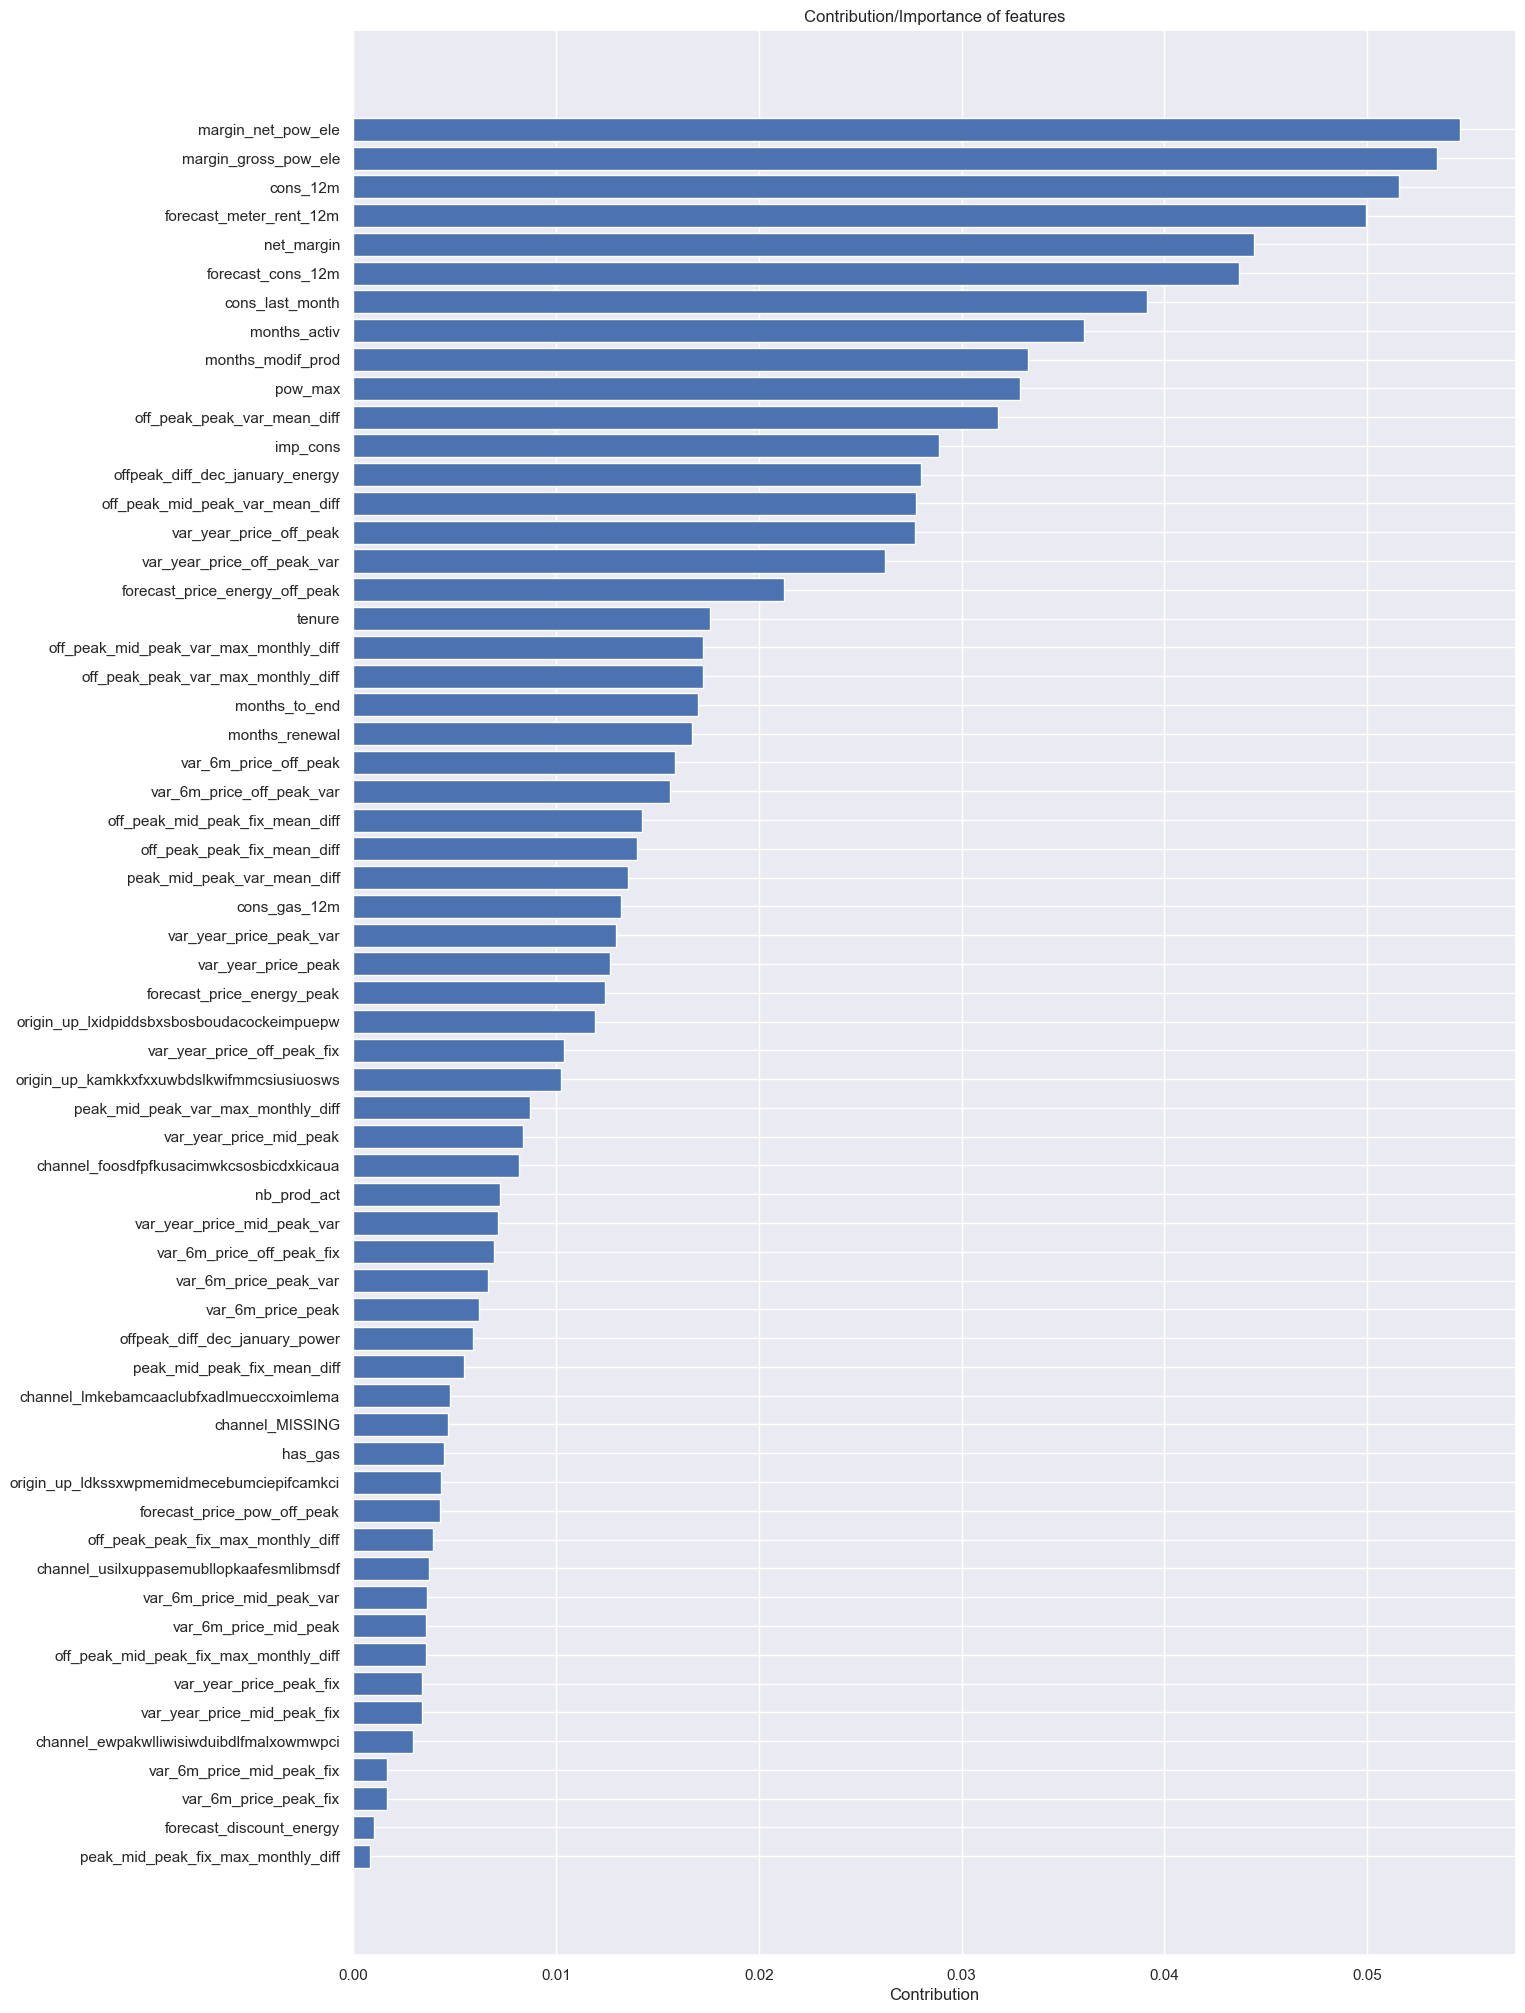

In [22]:
plt.figure(figsize=(15,25))
plt.title("Contribution/Importance of features")
# plt.barh(y,x)
plt.barh(range(len(feature_contribution)), feature_contribution["contribution"], color='b', align='center')
# plt.yticks(positions for y-axis ticks, lables)
plt.yticks(range(len(feature_contribution)), feature_contribution["features"])
plt.xlabel('Contribution')
plt.show()

The first two features with largest contribution are margin_net_power_ele and margin_gross_pow_ele. 
Price-related features are distributed across different contribution values, indicating that price is not the primary determinant of customer churn.

In [27]:
proba_predictions = model.predict_proba(X_test)
print(proba_predictions)
# column 0: probability of instance belonging to class 0
# column 1: probability of instance belonging to class 1

[[0.94596121 0.05403879]
 [0.87051181 0.12948819]
 [0.94143006 0.05856994]
 ...
 [0.80500774 0.19499226]
 [0.91956308 0.08043692]
 [0.91433866 0.08566134]]


In [28]:
# get probability of the instance belonging to class 1
proba_predictions = proba_predictions[:,1]
print(proba_predictions)

[0.05403879 0.12948819 0.05856994 ... 0.19499226 0.08043692 0.08566134]


In [37]:
X_test = X_test.reset_index()
X_test = X_test.drop(columns = 'index')

In [39]:
X_test['churn'] = y_predict_adj.tolist() 
X_test['churn_probability'] = proba_predictions.tolist()
X_test.to_csv('data_with_predictions.csv')